## ASSIGNMENT - 2 (LOGISTIC REGRESSION)
#### KRISHNA SAH TELI
#### GE22M018

#### Importing Libraries

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Loading Data file

In [173]:
df_train= pd.read_csv("train.csv")
df_test= pd.read_csv("test.csv")

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#df_test[df_test.Parch>0][["Name","SibSp","Parch"]]

In [18]:
# Information about the shape of data
print("The total number of data entry is {} and data features is {}".format(df_train.shape[0],df_train.shape[1]))

The total number of data entry is 891 and data features is 12


In [5]:
# Finding the list of columns name

column_name= [x for x in df_train.columns]

print(column_name)


['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


Selection of important features

In [174]:
df_test= df_test.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
df_train= df_train.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], axis=1)


In [175]:
print(df_train.head())
print("*"*35)
print(df_test.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S
***********************************
   Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  34.5      0      0   7.8292        Q
1       3  female  47.0      1      0   7.0000        S
2       2    male  62.0      0      0   9.6875        Q
3       3    male  27.0      0      0   8.6625        S
4       3  female  22.0      1      1  12.2875        S


#### Data Cleaning

In [176]:
# Searching for nan 

df_train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

It shows there are data features (Age, and Embarked) have nan values

In [128]:
# Replacing nan value for Embarked features with the mode value as the number of nan is less.

df_train["Embarked"].fillna(df_train["Embarked"].mode()[0], inplace=True)

In [129]:
df_train["Embarked"].isna().sum()

0

In [79]:
df_train.shape

(891, 7)

In order to mitigate the nan value of Age features, first displot is plotted to see the age distribution.
It is found out that most of the passenges were of 15-35 age group.
So it would be usefull if i replace the nan with average value instead of dropping them.

Text(0.5, 1.0, 'Dist plot to see the Age distribution')

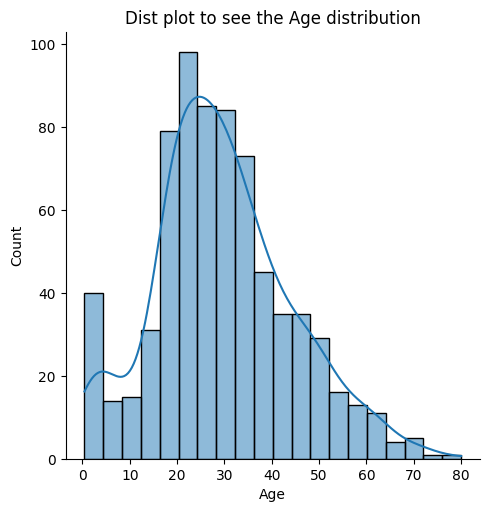

In [96]:
sns.displot(df_train["Age"], kde=True)
plt.title("Dist plot to see the Age distribution")

In [92]:
df_train["Age"].mean()

29.69911764705882

In [277]:
df_train["Age"].fillna(df_train["Age"].mean(), inplace=True)

In [131]:
df_train["Embarked"].isna().sum()

0

#### Datatype Correction

In [177]:
# Information about the data type of each features
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [101]:
# for Survived
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

0 = Not Survived
1 = Survived

In [105]:
# for Pclass
df_train.Pclass.value_counts().sort_index(ascending=True)

1    216
2    184
3    491
Name: Pclass, dtype: int64

It shows the class type of ticket.
1 = 1st class
2 = 2nd class
3 = 3rd class

In [132]:
# for Sex
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

Lets do mapping; male=1 and Female=0

In [216]:
df_train["Sex"]= df_train.Sex.map({"male": 1, "female": 0})

### Data Analysis

In [330]:
df_train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.538721
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.794231
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


#### how many people survived the disaster with the Titanic?

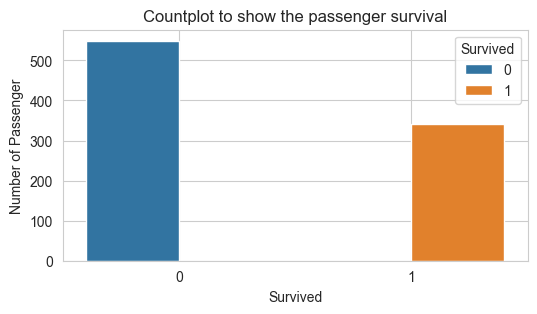

In [332]:
plt.figure(figsize=(6,3))
sns.countplot(x="Survived", data=df_train, hue= "Survived")
plt.ylabel("Number of Passenger")
plt.grid(True)
plt.title("Countplot to show the passenger survival")
plt.savefig('survive1.png', dpi=300)

It shows the number of passenger who survived is appromixately half of survived passenger.

#### Based on Gender

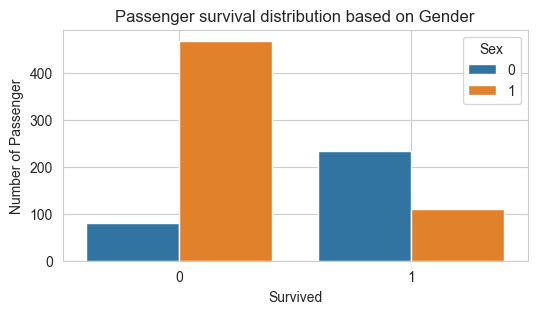

In [319]:
# Number of survived passenger based on gender

plt.figure(figsize=(6,3))
sns.countplot(x="Survived", data=df_train, hue="Sex")
plt.ylabel("Number of Passenger")
plt.grid(True)
plt.title("Passenger survival distribution based on Gender")
plt.savefig('surviveGender1.png', dpi=300)

It shows among the not survived passenger, the male passenger were significantly high. However, number of female survived passenger is approx double of survived male passenger. 


In [219]:
male= df_train[df_train["Sex"]==1].shape[0]
female= df_train[df_train["Sex"]==0].shape[0]


male_survived= df_train[df_train["Survived"]==1][df_train["Sex"]==1].shape[0]
female_survived= df_train[df_train["Survived"]==1][df_train["Sex"]==0].shape[0]

print("The survived male passenger was {} and female passenger was {}".format(male_survived,female_survived))

The survived male passenger was 109 and female passenger was 233


C:\Users\sahkr\AppData\Local\Temp\ipykernel_10704\750355659.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_survived= df_train[df_train["Survived"]==1][df_train["Sex"]==1].shape[0]
C:\Users\sahkr\AppData\Local\Temp\ipykernel_10704\750355659.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_survived= df_train[df_train["Survived"]==1][df_train["Sex"]==0].shape[0]


In [167]:
print("The proportion of survived male out of male passenger was {:.2f} and survived female out of female passenger was {:.2f}".format(male_survived/male, female_survived/female))

The proportion of survived male out of male passenger was 0.19 and survived female out of female passenger was 0.74


It may be because female passenger might have been given more priority while evacuating

#### Based on Pclass

Text(0.5, 1.0, 'The passenger distribution based on ticket class')

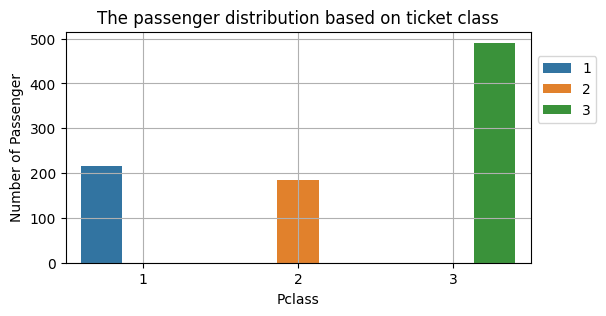

In [221]:
plt.figure(figsize=(6,3))
sns.countplot(x="Pclass", data=df_train, hue="Pclass")
plt.ylabel("Number of Passenger")
plt.grid(True)
plt.legend(loc="center left", bbox_to_anchor=(1,.75))
plt.title("The passenger distribution based on ticket class")

It shows the number of 3rd class passenger was quite more than other classes

Text(0.5, 1.0, 'Survival based on ticket class')

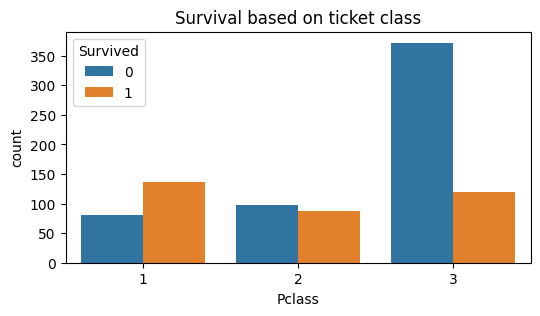

In [213]:
plt.figure(figsize=(6,3))
sns.countplot(x="Pclass", data=df_train, hue="Survived")
plt.title("Survival based on ticket class")

It shows the more number of 3rd class passenger had died with proportion to survived.

However, number of survival is more among 1st class passenger. It may be because they might have been given more preference than other classes of passenger.

#### Based on Fare

Text(0.5, 1.0, 'Fare Distribution Survived vs Non Survived')

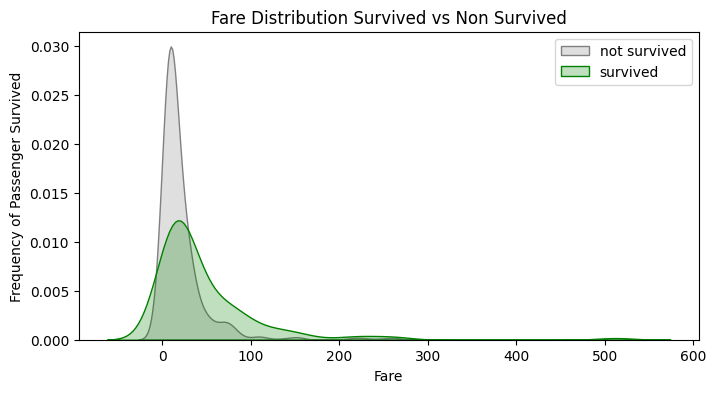

In [183]:
fig = plt.figure(figsize=(8,4),)
ax=sns.kdeplot(df_train.loc[(df_train['Survived'] == 0),'Fare'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(df_train.loc[(df_train['Survived'] == 1),'Fare'] , color='g',shade=True, label='survived')
plt.ylabel("Frequency of Passenger Survived")
plt.xlabel("Fare")
plt.legend()
plt.title('Fare Distribution Survived vs Non Survived')

It shows the person who had paid more got more priority over others. Hence number of survival for more paid pessanger is more

#### Based on Age

Text(0.5, 1.0, 'Age Distribution - Survived V.S. Non Survived')

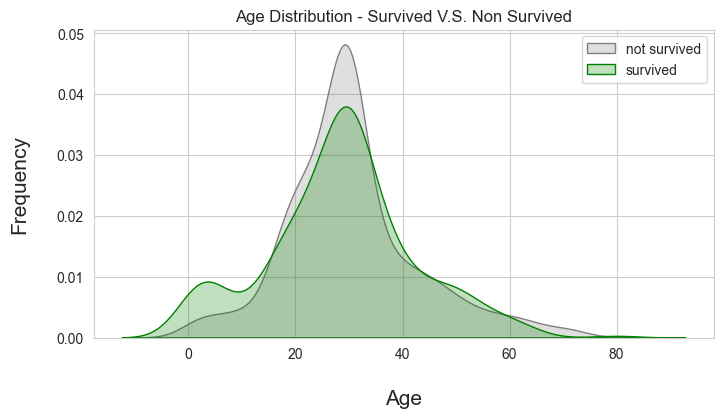

In [279]:
fig = plt.figure(figsize=(8,4))
ax=sns.kdeplot(df_train.loc[(df_train['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(df_train.loc[(df_train['Survived'] == 1),'Age'] , color='g',shade=True, label='survived')
plt.xlabel("Age", fontsize = 15, labelpad = 20)
plt.ylabel('Frequency', fontsize = 15, labelpad= 20);
plt.legend()
plt.title('Age Distribution - Survived V.S. Non Survived')

It shows the passenger of 15-40 age group had survived more than othe group of passenger. However, based on prortionality with non survival, child had survived more.

In [280]:
def find_age(age):
  if age<18:
    return "Child"
  elif age<45:
    return "Adult"
  else:
    return "Old"


In [281]:
new_data= df_train
new_data["IsChild"]= df_train["Age"].apply(lambda age: find_age(age))

In [263]:
new_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,IsChild
0,0,3,1,22.0,1,0,7.2500,S,Adult
1,1,1,0,38.0,1,0,71.2833,C,Adult
2,1,3,0,26.0,0,0,7.9250,S,Adult
3,1,1,0,35.0,1,0,53.1000,S,Adult
4,0,3,1,35.0,0,0,8.0500,S,Adult


Text(0.5, 1.0, 'Passenger distribution based on age')

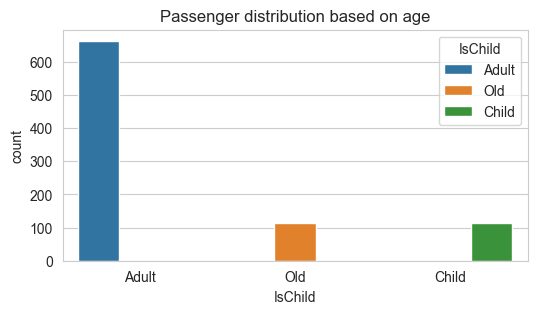

In [282]:
plt.figure(figsize=(6,3))
sns.countplot(x="IsChild", data=new_data, hue="IsChild")
plt.title("Passenger distribution based on age")

Text(0.5, 1.0, 'Survival Based on Age')

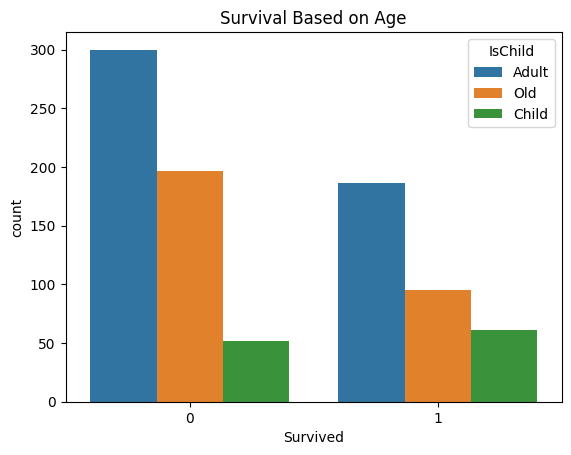

In [202]:
# It shows the number of child and young out of two different categories of Survived
sns.countplot(x="Survived", data=new_data, hue="IsChild")
plt.title("Survival Based on Age")

It shows more number of adult sacrificed own life in order to save child.

#### The relation among the survival, sex and age

d:\VS\env\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


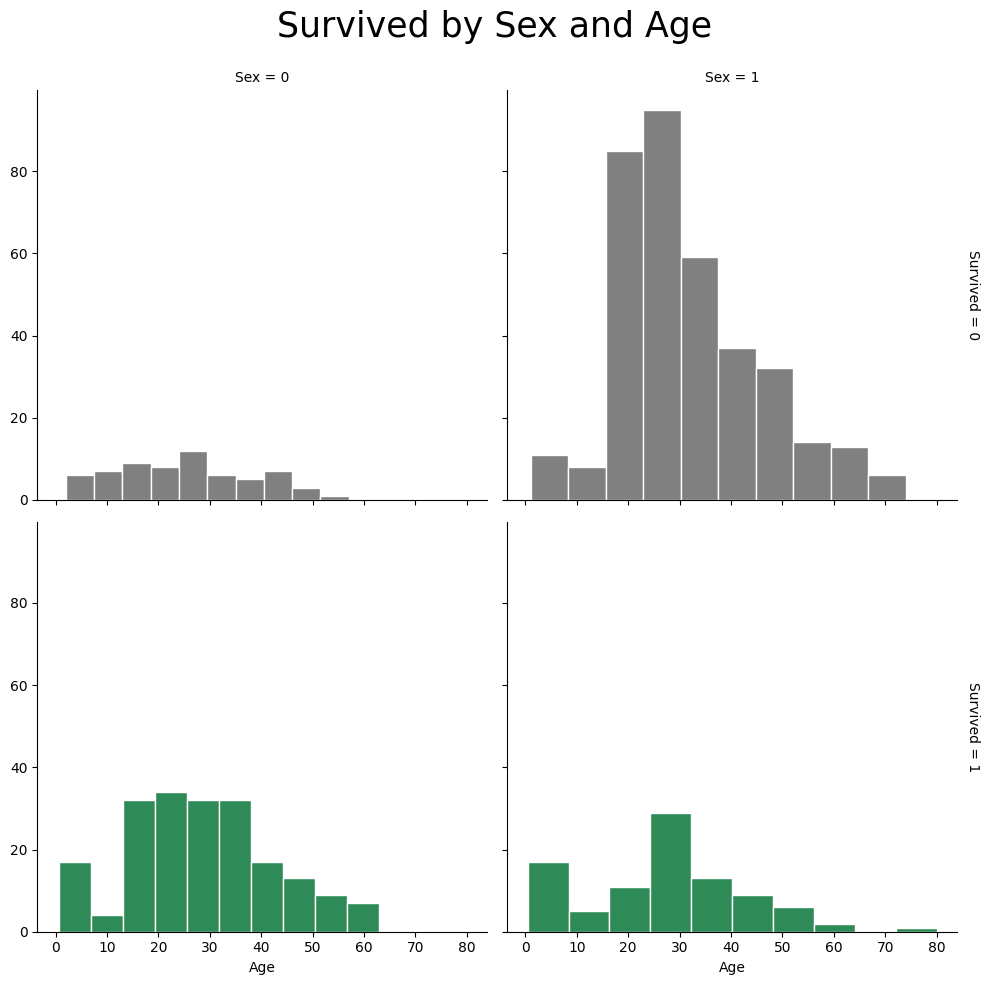

In [224]:
pal = {1:"seagreen", 0:"gray"}
g = sns.FacetGrid(df_train,size=5, col="Sex", row="Survived", margin_titles=True, hue = "Survived",
                  palette=pal)
g = g.map(plt.hist, "Age", edgecolor = 'white');
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

It shows that female passenger had survived more than male. Similarly compare to male passenger, less number of female had died.

#### Based on Boarding Location

Text(0.5, 1.0, 'Survival based on Boarding point')

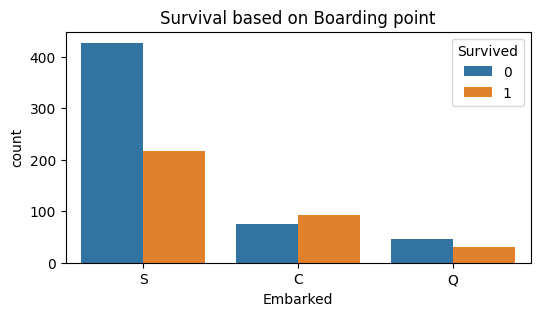

In [227]:
## Embarked shows the location of boardered
## three different categories: S: Southampton, Q: Queenstown, C: Cherberg

plt.figure(figsize=(6,3))
sns.countplot(x="Embarked", data=df_train, hue="Survived")
plt.title("Survival based on Boarding point")

d:\VS\env\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


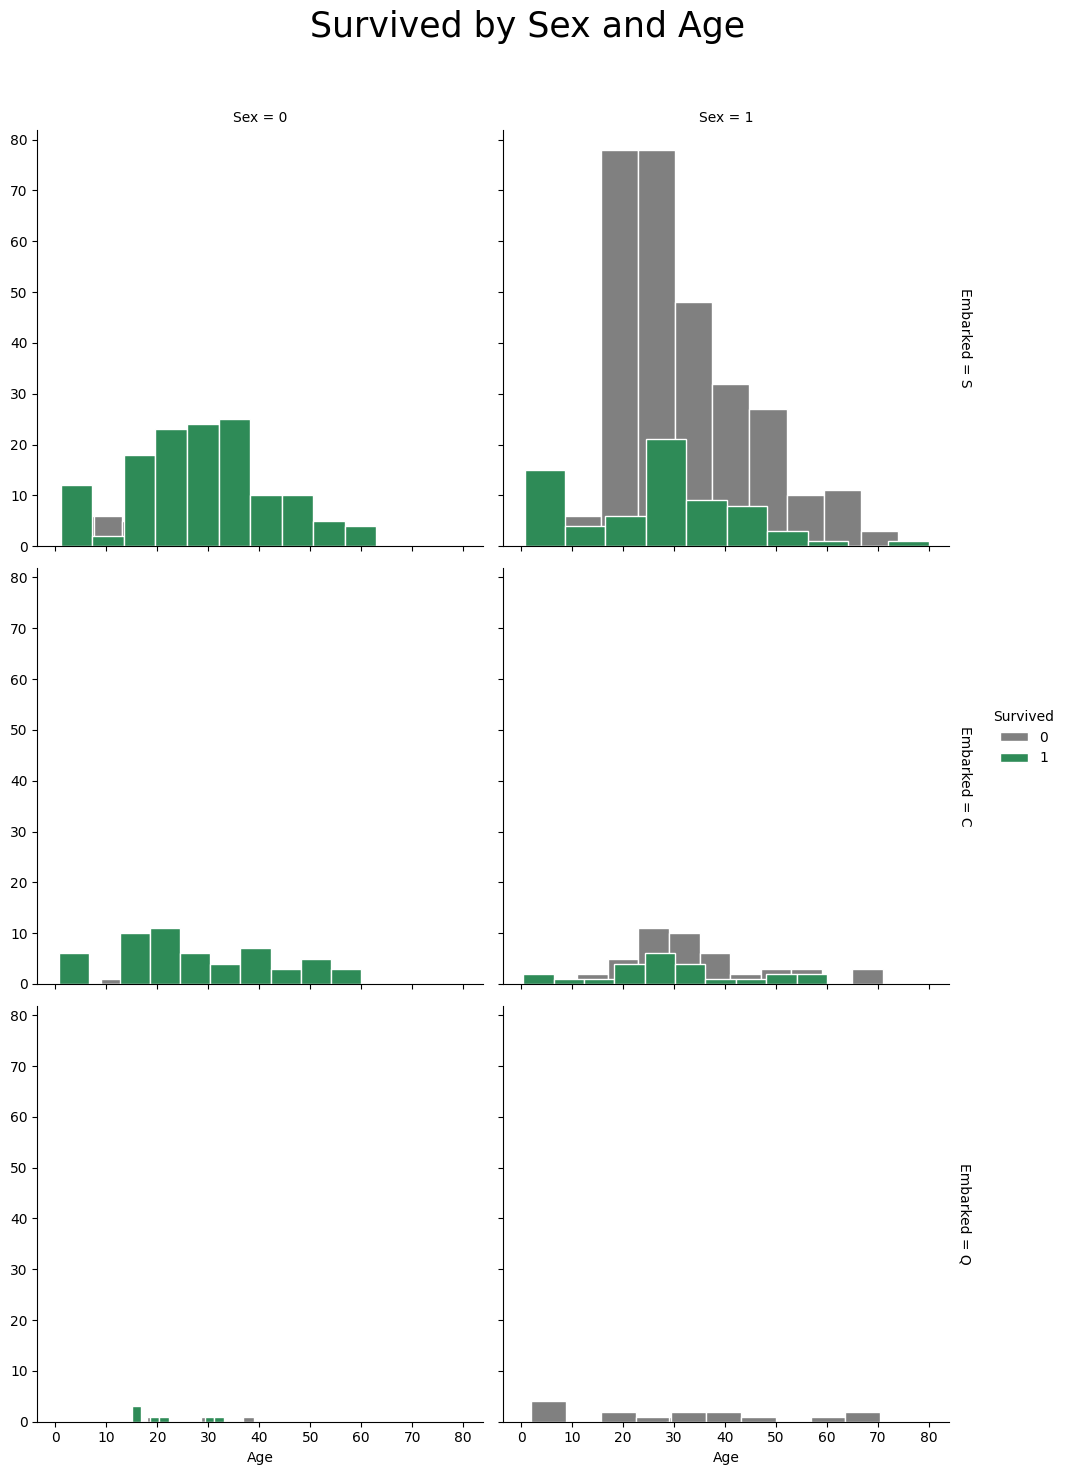

In [228]:
g = sns.FacetGrid(df_train,size=5, col="Sex", row="Embarked", margin_titles=True, hue = "Survived",
                  palette = pal
                  )
g = g.map(plt.hist, "Age", edgecolor = 'white').add_legend()
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

Comparatively, more number of passenger from southampton had taken boarding pass. Out of them, male passenger were more.

#### Based on Sibling/Spouse

d:\VS\env\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
d:\VS\env\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


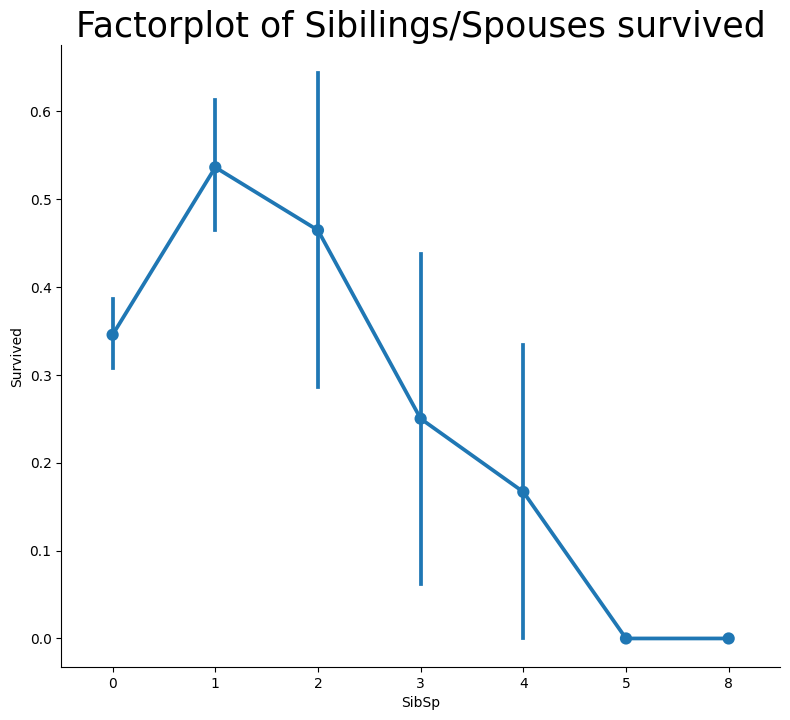

In [237]:
sns.factorplot(x =  "SibSp", y = "Survived", data = df_train, kind = "point",size = 8)
plt.title('Factorplot of Sibilings/Spouses survived', fontsize = 25)
plt.subplots_adjust(top=0.85)

It shows the passenger who travelled in small group of family had better survival than others

#### Summary

This train data set has 891 raw and 9 columns. the following findings have been gathered by our analysis
- only 38% passenger survived during that tragedy.
- ~74% female passenger survived, while only ~19% male passenger survived.
- ~63% first class passengers survived, while only 24% lower class passenger survived.
- about 12% passenger were child and out of them 53% were survived whereas 54% passenger were adult and out of them 38% were survived. Similarly 32 % passenger were old citizen and 32% of them survived.

### Predictive Model

In [253]:
pd.DataFrame(abs(df_train.corr()['Survived']).sort_values(ascending = False))

,Survived
Survived,1.000000
Sex,0.543351
Pclass,0.338481
Fare,0.257307
Parch,0.081629
Age,0.077221
SibSp,0.035322


It shows Sex is the most important features which has good correlation with survival feature

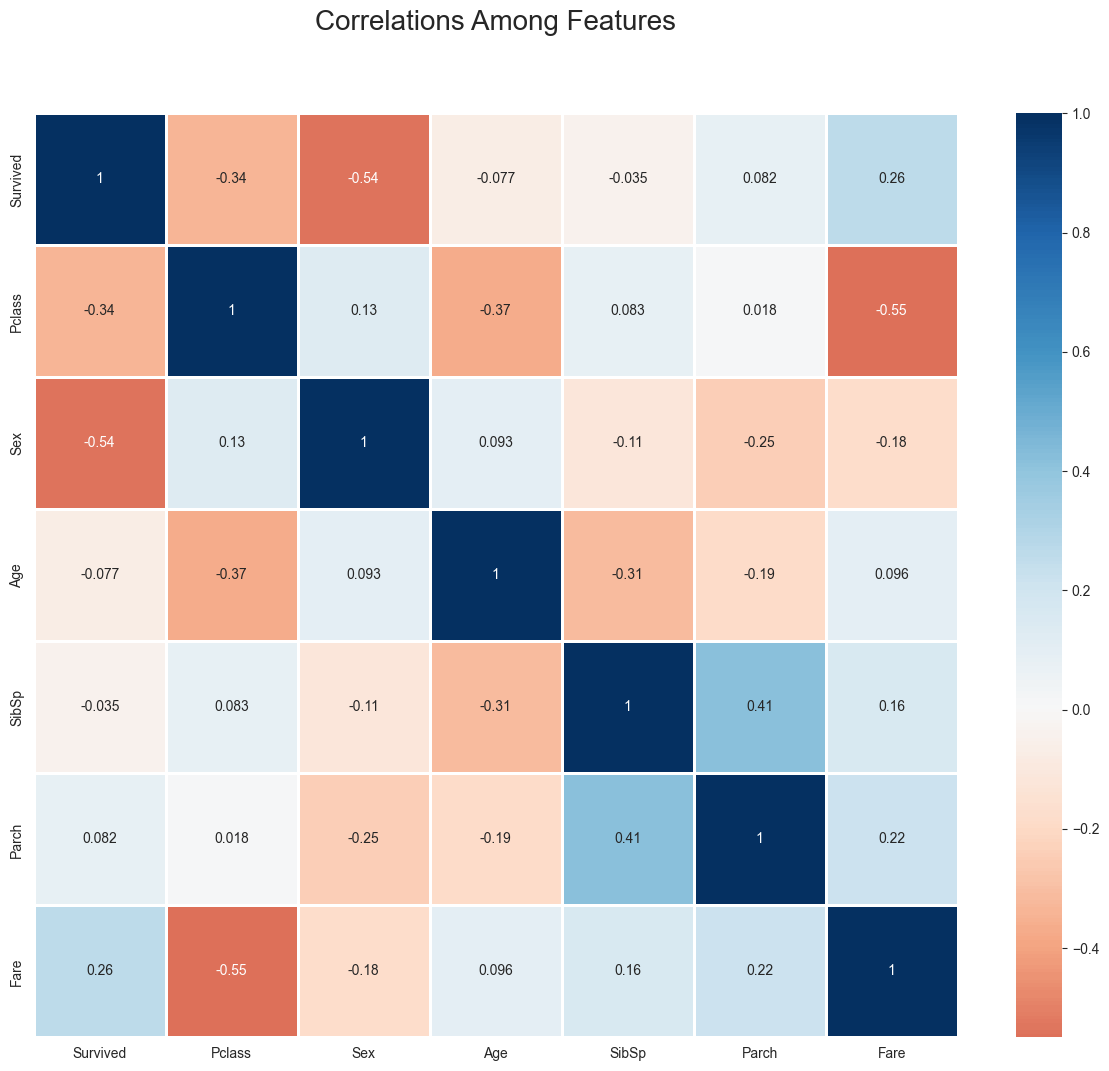

In [257]:
#Visualizing the correlation among the features using heatmap

#mask = np.zeros_like(df_train.corr(), dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
sns.heatmap(df_train.corr(), 
            annot=True,
            #mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

- It shows that the correlation between Fare and Survived is positvie i.e 0.26 and similarly between Parch and Survived but it is negligible i.e 0.082.
- There are negative corellation between Fare and Pclass (-0.55), Sex and survived (-0.54) and pclass and survived (-0.34)

In [260]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   IsChild   891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


Preprocessing

In [283]:
df_train= df_train.drop(columns="IsChild", axis=1)

Encoding

In [268]:
from sklearn import preprocessing
le= preprocessing.LabelEncoder()
df_train["Embarked"]= le.fit_transform(df_train["Embarked"])

In [284]:
# Rechecking
display(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(1), int64(5)
memory usage: 52.3 KB


None

Defining dependent and independent variables

In [286]:
X= df_train.drop("Survived", axis=1)
Y= df_train["Survived"]

Spliting data into training and testing dataset

In [309]:
# This is not required as we already testing data
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY= train_test_split(X, Y, test_size=.21)

In [310]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

## call on the model object
logreg = LogisticRegression(solver='liblinear',
                            penalty= 'l1',random_state = 42
                                
                            )

## fit the model with "train_x" and "train_y"
logreg.fit(trainX,trainY)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

#### Test data preprocessing

In [288]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [289]:
df_test.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [294]:
df_test= df_test.dropna()

In [295]:
df_test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [296]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 415
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    331 non-null    int64  
 1   Sex       331 non-null    object 
 2   Age       331 non-null    float64
 3   SibSp     331 non-null    int64  
 4   Parch     331 non-null    int64  
 5   Fare      331 non-null    float64
 6   Embarked  331 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 20.7+ KB


In [300]:
# Data type correction
df_test["Sex"]= df_test["Sex"].map({"male":1, "female":0})

In [301]:
df_test.Sex

0      1
1      0
2      1
3      1
4      0
      ..
409    0
411    0
412    0
414    0
415    1
Name: Sex, Length: 331, dtype: int64

In [302]:
test_le= preprocessing.LabelEncoder()
df_test["Embarked"]= test_le.fit_transform(df_test["Embarked"])

In [304]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 415
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    331 non-null    int64  
 1   Sex       331 non-null    int64  
 2   Age       331 non-null    float64
 3   SibSp     331 non-null    int64  
 4   Parch     331 non-null    int64  
 5   Fare      331 non-null    float64
 6   Embarked  331 non-null    int32  
dtypes: float64(2), int32(1), int64(4)
memory usage: 19.4 KB


In [305]:
df_test.shape

(331, 7)

#### Prediction

In [311]:
y_pred= logreg.predict(testX)

#### Accuracy

In [313]:
from sklearn.metrics import accuracy_score
accuracy_score(testY,y_pred)

0.8138297872340425

In [314]:
from sklearn.metrics import classification_report, confusion_matrix
# printing confision matrix
pd.DataFrame(confusion_matrix(testY,y_pred),\
            columns=["Predicted Not-Survived", "Predicted Survived"],\
            index=["Not-Survived","Survived"] )

,Predicted Not-Survived,Predicted Survived
Not-Survived,102,20
Survived,15,51


In [315]:
from sklearn.metrics import recall_score
recall_score(testY, y_pred)

0.7727272727272727

In [316]:
from sklearn.metrics import precision_score
precision_score(testY, y_pred)

0.7183098591549296

In [317]:
from sklearn.metrics import classification_report, balanced_accuracy_score
print(classification_report(testY, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       122
           1       0.72      0.77      0.74        66

    accuracy                           0.81       188
   macro avg       0.80      0.80      0.80       188
weighted avg       0.82      0.81      0.82       188

